In [2]:
#Importing Libraries and defining models
import torch
import torch.nn as nn

# --- Model Definition ---
class dead_neuron_ReLU(nn.Module):
    def __init__(self, n_dim_x, n_class_y, depth, width):
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        self.layers.append(nn.Linear(n_dim_x, width))
        for _ in range(depth - 1):
            self.layers.append(nn.Linear(width, width))
        self.out = nn.Linear(width, n_class_y)
        self.relu = nn.ReLU()

    def forward(self, x):
        self.activations = []  # reset stored activations
        for layer in self.layers:
            x = layer(x)
            x = self.relu(x)
            self.activations.append(x.detach().clone())  # store for later analysis
        return self.out(x)

class dead_neuron_LeakyReLU(nn.Module):
    def __init__(self, n_dim_x, n_class_y, depth, width):
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        self.layers.append(nn.Linear(n_dim_x, width))
        for _ in range(depth - 1):
            self.layers.append(nn.Linear(width, width))
        self.out = nn.Linear(width, n_class_y)
        self.leaky = nn.LeakyReLU()

    def forward(self, x):
        self.activations = []  # reset stored activations
        for layer in self.layers:
            x = layer(x)
            x = self.leaky(x)
            self.activations.append(x.detach().clone())  # store for later analysis
        return self.out(x)

class dead_neuron_ELU(nn.Module):
    def __init__(self, n_dim_x, n_class_y, depth, width):
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        self.layers.append(nn.Linear(n_dim_x, width))
        for _ in range(depth - 1):
            self.layers.append(nn.Linear(width, width))
        self.out = nn.Linear(width, n_class_y)
        self.elu = nn.ELU()

    def forward(self, x):
        self.activations = []  # reset stored activations
        for layer in self.layers:
            x = layer(x)
            x = self.elu(x)
            self.activations.append(x.detach().clone())  # store for later analysis
        return self.out(x)

class dead_neuron_PReLU(nn.Module):
    def __init__(self, n_dim_x, n_class_y, depth, width):
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        self.layers.append(nn.Linear(n_dim_x, width))
        for _ in range(depth - 1):
            self.layers.append(nn.Linear(width, width))
        self.out = nn.Linear(width, n_class_y)
        self.prelu = nn.PReLU()

    def forward(self, x):
        self.activations = []  # reset stored activations
        for layer in self.layers:
            x = layer(x)
            x = self.prelu(x)
            self.activations.append(x.detach().clone())  # store for later analysis
        return self.out(x)

class dead_neuron_SELU(nn.Module):
    def __init__(self, n_dim_x, n_class_y, depth, width):
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        self.layers.append(nn.Linear(n_dim_x, width))
        for _ in range(depth - 1):
            self.layers.append(nn.Linear(width, width))
        self.out = nn.Linear(width, n_class_y)
        self.selu = nn.SELU()

    def forward(self, x):
        self.activations = []  # reset stored activations
        for layer in self.layers:
            x = layer(x)
            x = self.selu(x)
            self.activations.append(x.detach().clone())  # store for later analysis
        return self.out(x)

class ALReLU(nn.Module):
    def __init__(self, alpha=0.01):
        super().__init__()
        self.alpha = alpha

    def forward(self, x):
        return torch.max(torch.abs(self.alpha * x), x)

class dead_neuron_ALReLU(nn.Module):
    def __init__(self, n_dim_x, n_class_y, depth, width):
        super().__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        self.layers.append(nn.Linear(n_dim_x, width))
        for _ in range(depth - 1):
            self.layers.append(nn.Linear(width, width))
        self.out = nn.Linear(width, n_class_y)
        self.alrelu = ALReLU()

    def forward(self, x):
        self.activations = []  # reset stored activations
        for layer in self.layers:
            x = layer(x)
            x = self.alrelu(x)
            self.activations.append(x.detach().clone())  # store for later analysis
        return self.out(x)

In [16]:
#Test case

# --- Model Setup ---
model = dead_neuron_LeakyReLU(n_dim_x=1, n_class_y=1, depth=30, width=8)

# Dummy input (batch of 100 samples, 1 feature)
x_input = torch.randn(100, 1)

# Forward pass to collect activations
with torch.no_grad():
    _ = model(x_input)

tol = 0.1 ** 10

# --- Dead Neuron Counting ---
dead_node_counts = []
for act in model.activations:
    # act shape: [batch_size, width]
    is_dead = (act.abs() < tol).all(dim=0)  # dead if <0.1 for ALL samples in batch
    dead_node_counts.append(is_dead.sum().item())

total_dead = sum(dead_node_counts)
total_units = sum(act.shape[1] for act in model.activations)

print(f"Dead nodes: {total_dead}/{total_units}")


Dead nodes: 0/240


In [27]:
#Loop to go through and check

functs = ['ReLU', 'Leaky', 'ELU', 'PReLU', 'SELU', 'ALReLU']

x_input = torch.randn(100, 1)
tol = 0.1 ** 5

for f in functs:
    if f == 'ReLU':
        model = dead_neuron_ReLU(1, 1, 30, 8)
    if f == 'Leaky':
        model = dead_neuron_LeakyReLU(1, 1, 30, 8)
    if f == 'ELU':
        model = dead_neuron_ELU(1, 1, 30, 8)
    if f == 'PReLU':
        model = dead_neuron_PReLU(1, 1, 30, 8)
    if f == 'SELU':
        model = dead_neuron_SELU(1, 1, 30, 8)
    if f =='ALReLU':
        model = dead_neuron_ALReLU(1, 1, 30, 8)
    with torch.no_grad():
        _ = model(x_input)
    dead_node_counts = []
    for act in model.activations:
        # act shape: [batch_size, width]
        is_dead = (act.abs() < tol).all(dim=0)  # dead if <0.1 for ALL samples in batch
        dead_node_counts.append(is_dead.sum().item())
    
    total_dead = sum(dead_node_counts)
    total_units = sum(act.shape[1] for act in model.activations)
    
    print(f"{f}: {total_dead}/{total_units}")
#Yup, shows that dead neurons exist
#And tested it to see if it's a function of depth

ReLU: 114/240
Leaky: 0/240
ELU: 0/240
PReLU: 0/240
SELU: 0/240
ALReLU: 0/240


In [39]:
#Now time to make a loop :)!!
    #Will do a loop just for depths
    #Create dict for graphing proportion of total_dead
    #actually only need to do for ReLU probably?
        #Will do two reps, one low tolerance one high tolerance

functs = ['ReLU', 'Leaky', 'ELU', 'PReLU', 'SELU', 'ALReLU']
tol_names = ['large', 'medium', 'small']
depths = [1, 3, 10, 30]

dead_neurons = {}

for i in depths:
    for tol in tol_names:
        if tol == 'large':
            t = 0.1 ** 2
        if tol == 'medium':
            t = 0.1 ** 3
        if tol == 'small':
            t = 0.1 ** 5
        for f in functs:
            if f == 'ReLU':
                model = dead_neuron_ReLU(1, 1, i, 8)
            if f == 'Leaky':
                model = dead_neuron_LeakyReLU(1, 1, i, 8)
            if f == 'ELU':
                model = dead_neuron_ELU(1, 1, i, 8)
            if f == 'PReLU':
                model = dead_neuron_PReLU(1, 1, i, 8)
            if f == 'SELU':
                model = dead_neuron_SELU(1, 1, i, 8)
            if f =='ALReLU':
                model = dead_neuron_ALReLU(1, 1, i, 8)
            with torch.no_grad():
                _ = model(x_input)
            dead_node_counts = []
            for act in model.activations:
                # act shape: [batch_size, width]
                is_dead = (act.abs() < t).all(dim=0)  # dead if <0.1 for ALL samples in batch
                dead_node_counts.append(is_dead.sum().item())
            
            total_dead = sum(dead_node_counts)
            total_units = sum(act.shape[1] for act in model.activations)
            dead_neurons[f"prop_dead_{f}_depth_{i}_tol_{tol}"] = total_dead / total_units
dead_neurons

{'prop_dead_ReLU_depth_1_tol_large': 0.125,
 'prop_dead_Leaky_depth_1_tol_large': 0.125,
 'prop_dead_ELU_depth_1_tol_large': 0.0,
 'prop_dead_PReLU_depth_1_tol_large': 0.0,
 'prop_dead_SELU_depth_1_tol_large': 0.0,
 'prop_dead_ALReLU_depth_1_tol_large': 0.125,
 'prop_dead_ReLU_depth_1_tol_medium': 0.25,
 'prop_dead_Leaky_depth_1_tol_medium': 0.0,
 'prop_dead_ELU_depth_1_tol_medium': 0.0,
 'prop_dead_PReLU_depth_1_tol_medium': 0.0,
 'prop_dead_SELU_depth_1_tol_medium': 0.0,
 'prop_dead_ALReLU_depth_1_tol_medium': 0.0,
 'prop_dead_ReLU_depth_1_tol_small': 0.0,
 'prop_dead_Leaky_depth_1_tol_small': 0.0,
 'prop_dead_ELU_depth_1_tol_small': 0.0,
 'prop_dead_PReLU_depth_1_tol_small': 0.0,
 'prop_dead_SELU_depth_1_tol_small': 0.0,
 'prop_dead_ALReLU_depth_1_tol_small': 0.0,
 'prop_dead_ReLU_depth_3_tol_large': 0.375,
 'prop_dead_Leaky_depth_3_tol_large': 0.20833333333333334,
 'prop_dead_ELU_depth_3_tol_large': 0.0,
 'prop_dead_PReLU_depth_3_tol_large': 0.0,
 'prop_dead_SELU_depth_3_tol_large'

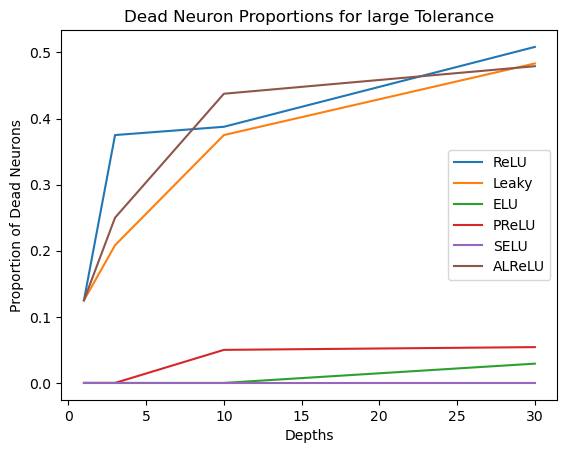

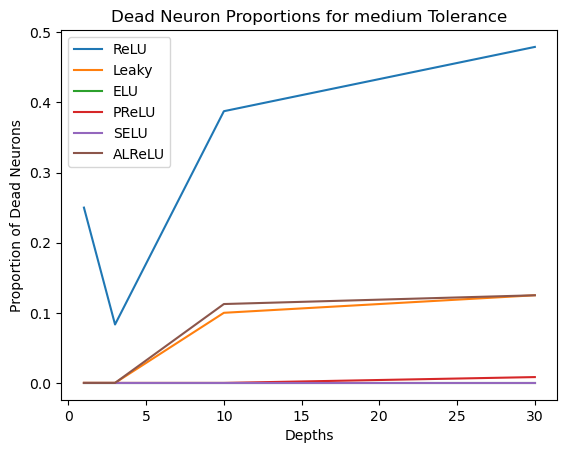

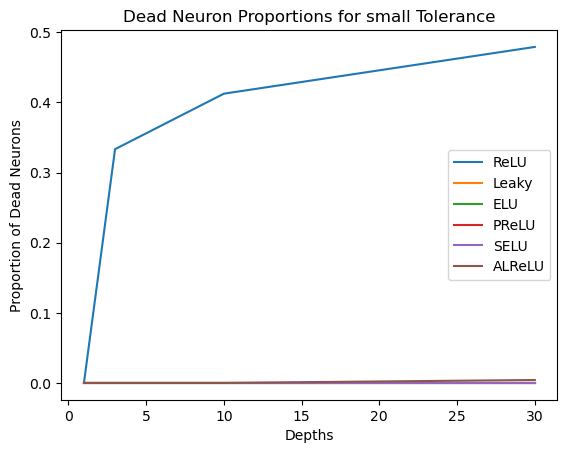

In [41]:
#Graphing stuff

import matplotlib.pyplot as plt

graph_data = {}
for tol in tol_names:
    for f in functs:
        tol_f = []
        for i in depths:
            tol_f.append(dead_neurons[f"prop_dead_{f}_depth_{i}_tol_{tol}"])
        graph_data[f"prop_dead_{f}_tol_{tol}"] = tol_f
        plt.plot(depths, tol_f, label = f"{f}")
    plt.xlabel("Depths")
    plt.ylabel("Proportion of Dead Neurons")
    plt.title(f"Dead Neuron Proportions for {tol} Tolerance")
    plt.legend()
    plt.savefig(f"dead_neurons_{tol}.png", bbox_inches='tight')
    plt.show()